<a href="https://colab.research.google.com/github/miafontana-ship-it/capstone-project/blob/main/Olympics_SportsBetting_Capstone_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Olympics & Sports Betting**
**Data Analytics Capstone Project**

In recent years, sports betting has grown rapidly, and bettors are constantly searching for new ways to predict outcomes and improve their chances of winning. In this project, I use 120 years of Olympic Games data to identify which countries perform best, which sports they tend to excel in, and whether any patterns emerge that could inform betting strategies for the 2020 Olympic Games.

For the purposes of this analysis, I assume we are in 2019 and are using historical Olympic performance to place strategic bets on the upcoming 2020 Games.


I use the [olympics dataset](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) from kaggle, and decided to merge it with the country wise [gdp](https://www.kaggle.com/resulcaliskan/countries-gdps) and [population data](https://www.kaggle.com/centurion1986/countries-population).



##**1) Executive Summary**
The goal of this project was to explore what factors help countries perform well at the Olympic Games and how this information could be used to support future predictions, such as sports betting analysis for the 2020 and 2024 Olympics. To study this, I combined multiple datasets, including historical Olympic athlete results, GDP data, and population data from 1960 onward. After cleaning and restructuring the data (fixing country codes, reshaping GDP and population tables, and merging them by country and year), I created a complete dataset that allowed for country-level comparisons. I also built new variables—such as whether a medal was won, whether an event was a team event, and a corrected medal count that removes the advantage of larger team sizes.

Using exploratory data analysis, I examined how medal counts changed over time and which countries consistently performed the best. I then used transformation techniques in Python to prepare the data for visualizations and final modeling. For the BI component, the cleaned dataset can now be easily used in Looker Studio to create interactive dashboards showing medal trends, country performance, and economic factors. The key insights show that the United States, Russia, Germany, and China have the strongest long-term Olympic performance, even after adjusting for team size. Wealthier countries with larger populations generally win more medals, but economic growth over time also appears to influence which nations become rising competitors.

Overall, the project demonstrates how multiple data sources can be combined to better understand Olympic success. Moving forward, this cleaned dataset and modeling approach can support more advanced forecasting, probability modeling, or real-time sports analytics applications and sport betting


###**2) Problem Definition & Stakeholders**

This project focuses on whether we can make better Olympic sports-betting predictions by analyzing historical performance data. The goal is to see if factors like GDP, population, and past medal trends help identify which countries are most likely to win medals in future Games. This matters because betting markets often rely on expert opinion or surface-level stats, but deeper historical patterns may offer an edge in predicting outcomes. This project aims to help sports bettors make better informed choices based on historical data.

The key stakeholders are sports bettors, forecasting platforms, sportsbooks, and sports analysts who want more accurate medal expectations. If applied in real life, these findings could influence how betting odds are set, which countries bettors choose to back, and how analysts build prediction models for upcoming Olympics.

**1. Sports Bettors (Primary Stakeholder)**

Sports bettors represent the main stakeholder, as they experience the highest level of uncertainty and financial risk when placing Olympic wagers. Their pain point lies in the difficulty of making informed predictions due to irregular event schedules, evolving global competition, and limited public analytics compared with major leagues like the NFL or NBA. This project aims to reduce that uncertainty by identifying long-term patterns in country and sport performance, enabling bettors to make more data-driven decisions.

**2. Sportsbooks / Betting Companies**

Sportsbooks benefit from improved forecasting models and deeper understanding of historical patterns, which help them set more accurate and competitive odds. Analytical insight from this project can help refine risk management and odds calibration.

**3. Sports Analysts and Data Strategists**

Analysts who cover the Olympics (including broadcasters, journalists, or performance researchers) can use long-term metrics to contextualize expected outcomes. They aim to explain why certain countries or sports remain dominant and identify which trends may be shifting heading into 2020. This analysis provides a structured, historically grounded framework for those interpretations.

###**3) Project Management Frameworks**

####3.1 CHRISP-DM Overview

For this project, I followed the CRISP-DM process. First, I defined the business goal, using Olympic data to help make better sports-betting predictions. Then I explored the datasets to understand medal trends, GDP, host effects, and event-level results. After that, I cleaned and merged everything, corrected medal counts for team events, and created the features needed for modeling. I tested a simple model and created visualizations to see which factors actually predict medal outcomes. I evaluated how well the results matched real Olympic patterns, and finally, I deployed the project through my dashboard and final written report.

####3.2 OKRs

Objective 1: Build a clean, usable Olympic dataset for prediction.

* Merge and clean all data with minimal missing values

* Create event-level medal counts

* Produce key visualizations to understand patterns

* Prepare a final dataset ready for modeling and dashboards

Objective 2: Provide helpful insights for sports-betting decisions.

* Build at least one predictive model

* Identify a few reliable patterns or countries to watch

* Create an interactive dashboard

* Summarize findings and recommendations clearly in the report

####3.3 RACI (Short Version)

* a simple project-management tool that shows who is involved in each task and what their role is.

| Task / Phase             | Responsible (Does the Work) | Accountable (Owns the Outcome) | Consulted (Provides Input) | Informed (Updated on Progress) |
| ------------------------ | --------------------------- | ------------------------------ | -------------------------- | ------------------------------ |
| Business Understanding   | **Me**                      | **Me**                         | Instructor                 | Stakeholders (bettors)         |
| Data Understanding       | **Me**                      | **Me**                         | —                          | —                              |
| Data Preparation         | **Me**                      | **Me**                         | —                          | —                              |
| Modeling                 | **Me**                      | **Me**                         | —                          | —                              |
| Evaluation               | **Me**                      | **Me**                         | Instructor                 | —                              |
| Dashboard & Final Report | **Me**                      | **Me**                         | —                          | Instructor                     |



#**4) Data Sources & Collection**

For Data Source URL links see the top of the page.

This project uses three datasets: historical Olympic athlete results, World Bank GDP data, and global population data. Each dataset was downloaded as a CSV file and includes information by country and year, which made them easy to merge after cleaning and reshaping. These sources fit the project because they connect performance outcomes with economic and demographic factors that may influence Olympic success and betting predictions.

The datasets were joined using country codes and years, creating a combined table suitable for analysis and visualization.


In [2]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
os.listdir()


['.config',
 'GDP.csv',
 'olympics_cleaned.csv',
 'noc_regions.csv',
 'World_Population.csv',
 'medal_tally_agnostic.csv',
 'athlete_events.csv',
 'sample_data']

In [4]:
import pandas as pd

df_athletes = pd.read_csv("/content/athlete_events.csv")
df_regions = pd.read_csv("/content/noc_regions.csv")
df_gdp = pd.read_csv("/content/GDP.csv")
df_pop = pd.read_csv("/content/World_Population.csv")

df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


##**5) Cloud Architecture Choice**

###**Modern Data Stack Summary**

For this project, I did not host the data in the cloud and instead worked in Google Colab with pandas because the datasets are small and easily handled in memory. However, in a real-world sports-betting environment where data volumes are larger and need to be refreshed continuously, a cloud data warehouse such as BigQuery would be the best architectural choice. A warehouse supports structured, analytical queries, integrates smoothly with BI tools like Tableau, and scales cost-effectively since storage is inexpensive and compute is used only when queries run. A warehouse architecture would also allow future expansion, such as modeling more Olympic cycles, adding athlete-level streaming data, or building predictive dashboards for oddsmakers and analysts.

All of my data transformations are done in Google Colab using Python and pandas. I load the raw CSV files, clean them, merge the Olympic, GDP, and population datasets, filter years, and create new features such as corrected medal counts. Colab works well for this because the datasets are small, easy to handle in memory, and simple to explore interactively.

If this were a real production environment, such as working for a sports analytics or sports betting company, the setup would likely look different. A warehouse like BigQuery or Snowflake would store large datasets, dbt could manage SQL transformations, and dashboards would be built on top of curated tables. For this project, I will use LookerStudio as my BI tool to create visualizations. I will also use GitHub to store my code and cleaned datasets.

The modeling I perform is analytical rather than machine learning. I focus on understanding patterns in Olympic performance, such as medal trends, country comparisons, and relationships with GDP and population. These insights support how one might think about sports-betting predictions for future Olympics.

###**6) Data Ingestion**

6.1 Method Used

I ingested the data through a one-time CSV upload into Google Colab. I downloaded the Olympic athlete dataset, GDP dataset, and population dataset as CSV files and loaded them into pandas using basic Python read_csv() commands. Since the data is static and does not need to refresh automatically, this manual ingestion method was sufficient for a class project.

6.2 Real-World Alternative

In a real sports-betting or analytics environment, this project would need programmatic ingestion to keep the data updated across multiple Olympic cycles. Tools like an API pipeline would automate pulling new GDP data, population updates, and future Olympic results. This matters because real-world systems require reliability, repeatability, and timely updates without manual downloading. Data volumes would still be moderate, but the update frequency (annual GDP, annual population, and every Olympic Games) means automation would save time and reduce errors. A programmatic ingestion pipeline would also make it easier to scale the project, support dashboards, and integrate with a cloud warehouse like BigQuery.


##**7) Cleaning and Merging Data**

The first five rows of the olympics data are shown below. There are have 271,116 rows and 15 columns. Columns include Name, Sex, Age, Height, Weight of the athlete, their team name, sport, event and the year, season, city of the olympics he/she took part in. In addition, the data captures the medal won (if any) by the athlete.

In [5]:
# Read in the data set
olympics = pd.read_csv('athlete_events.csv')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#### Missing Values
Printing column wise missing values...

In [6]:
print(olympics.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


We can see that height, weight and age have a lot of missing values.

Medals have a NaN in about 231,333 rows as not all participating athletes win medals. I will replace these missing values with 'Did not win' or 'DNW'

In [7]:
olympics['Medal'].fillna('DNW', inplace = True)

/tmp/ipython-input-2160398606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics['Medal'].fillna('DNW', inplace = True)


In [8]:
# the NaNs in the 'Medal' column disappear
print(olympics.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


#### NOC - National Olympic Committee
These are responsible for organizing their people's participation in the Olympics.

Are all NOCs linked to a unique team?

In [9]:
print(olympics.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: count, dtype: int64


Use the noc_regions.csv to correct this by aligning NOC with each country

The NOC data has the NOC code and the corresponding Country Name.

In [10]:
# noc_country mapping
noc_country = pd.read_csv('noc_regions.csv')
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)

noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


Merge the original dataset with the NOC master using the NOC code as the primary key. (This will be a left join since we want all participating countries to remain in the data even if their NOC-Country is not found in the master).

In [11]:
# merging
olympics_merge = olympics.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

We still have NOCs that didn't have a matching country in the noc_region.csv

In [12]:
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


Manually insert the correct values.

    1. SGP - Singapore
    2. ROT - Refugee Olympic Athletes
    3. UNK - Unknown
    4. TUV - Tuvalu

In [13]:

import numpy as np

# Make sure we have a Country column first
if 'Country' not in olympics_merge.columns:

    if 'region' in olympics_merge.columns:
        olympics_merge['Country'] = olympics_merge['region']
    elif 'Team' in olympics_merge.columns:
        olympics_merge['Country'] = olympics_merge['Team']
    else:
        print("Available columns:", olympics_merge.columns.tolist())
        raise KeyError("No Country-like column found to start from.")

# Fix special NOC codes
olympics_merge.loc[olympics_merge['NOC'] == 'SGP', 'Country'] = 'Singapore'
olympics_merge.loc[olympics_merge['NOC'] == 'ROT', 'Country'] = 'Refugee Olympic Athletes'
olympics_merge.loc[olympics_merge['NOC'] == 'UNK', 'Country'] = 'Unknown'
olympics_merge.loc[olympics_merge['NOC'] == 'TUV', 'Country'] = 'Tuvalu'

# Put these values from Country into Team
if 'Team' in olympics_merge.columns:
    olympics_merge['Team'] = np.where(
        olympics_merge['Team'].isna(),
        olympics_merge['Country'],
        olympics_merge['Team']
    )
else:
    # or just rename Country -> Team
    olympics_merge.rename(columns={'Country': 'Team'}, inplace=True)

olympics_merge.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands


### Merge GDP data

By merging GDP data to the tabel, this allows us to better see if there is a correlation between GDP and medal count per country.

In [14]:
w_gdp = pd.read_csv('GDP.csv', skiprows=3)
# Remove unnecessary columns
if 'Indicator Name' in w_gdp.columns and 'Indicator Code' in w_gdp.columns:
    w_gdp.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

# The columns are the years GDP has been recorded.
v_gdp = pd.melt(
    w_gdp,
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='GDP'
)

# convert the year column to numeric
v_gdp['Year'] = pd.to_numeric(v_gdp['Year'])

v_gdp.head()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [15]:
olympics_merge_gdp = olympics_merge.merge(
    v_gdp[['Country Code', 'Year', 'GDP']],
    left_on=['NOC', 'Year'],
    right_on=['Country Code', 'Year'],
    how='left'
)

olympics_merge_gdp.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Country Code,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269157e+11
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560547e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,NaN


#### Merge Population Data
Population is also important when looking at a countries performance.

1. Higher populations mean a bigger talent pool to choose from
2. Its not GDP alone but GDP per capita that decides how much resources a country has.

In [16]:
import pandas as pd

pop_raw = pd.read_csv("World_Population.csv")
pop_raw.head()

# Identify year columns
year_cols = [col for col in pop_raw.columns if col.isdigit()]

pop_long = pop_raw.melt(
    id_vars=["Country", "Country Code"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Population"
)

# Convert year to numeric
pop_long["Year"] = pd.to_numeric(pop_long["Year"])
pop_long["Population"] = pd.to_numeric(pop_long["Population"], errors="coerce")

pop_long.head()


,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


Merging country population based on the year each athlete performed

In [17]:
athletes = olympics_merge_gdp

olympics_merge_pop = athletes.merge(
    pop_long[["Country Code", "Year", "Population"]],
    left_on=["NOC", "Year"],
    right_on=["Country Code", "Year"],
    how="left"
)

olympics_merge_pop = olympics_merge_pop.drop(
    columns=[col for col in olympics_merge_pop.columns if col.startswith("Country Code")]
)

olympics_merge_pop.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,4.269157e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,8.560547e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,NaN


Lets focus on data only from 1960 onward as the GDP data does not go back to the begining of the Olympics.



In [18]:
olympics_merge_pop

olympics_clean = olympics_merge_pop[olympics_merge_pop['Year'] >= 1960].copy()

olympics_clean.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,4.269157e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,8.560547e+12,1.350695e+09
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NaN,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,NaN




# **8) Exploratory Data Analysis - EDA**

###**Visualizations**
1. Medal Distribution per Country
2. Trend Line of Top Countries Over Time
3. GDP vs. Medal Scatterplot
4. Population vs Medal Scatterplot

Who has the most medals across all editions of the olympics?

We can create a column that captures whether or not a medal was won. It would be 1 if Medal column says Gold, Silver or Bronze and 0 otherwise.

In [19]:
olympics_clean['Medal_Won'] = (olympics_clean['Medal'] != 'DNW').astype(int)
olympics_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,GDP,Population,Medal_Won
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,4.269157e+11,1.164970e+09,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,8.560547e+12,1.350695e+09,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,NaN,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NaN,NaN,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,NaN,0


####If a team wins more than one gold medal for an event in an edition of the olympics, then that event is a team event. Lets account for team sports.


In [20]:
identify_team_events = pd.pivot_table(
    olympics_clean,
    index=['Team', 'Year', 'Event'],
    columns='Medal',
    values='Medal_Won',
    aggfunc='sum',
    fill_value=0
).drop('DNW', axis=1).reset_index()

identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]
team_sports = identify_team_events['Event'].unique()


The list below gives names of each event where in a single edition multiple golds were given. Although these are ecognised as team events, they are not actually team events.

    1. Gymnastics Women's Balance Beam
    2. Gymnastics Men's Horizontal Bar
    3. Swimming Women's 100 metres Freestyle
    4. Swimming Men's 50 metres Freestyle

These are actually single events but because two athletes had the same score/time, both were awarded the gold medal. We need to remove these events from the list of team sports

In [21]:
remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar",
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]

team_sports = list(set(team_sports) - set(remove_sports))

 Add a column in the dataset that identifies whether the event is a team event or a single event. We use this column to calculate the medal tally for each country.

In [22]:
# if an event name matches one in team_sports, then it is a team event
team_event_mask = olympics_clean['Event'].isin(team_sports)
single_event_mask = ~team_event_mask

# rows where a medal was won
medal_mask = olympics_clean['Medal_Won'] == 1

# 1 under team event if medal is won and event is in team event list
olympics_clean['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)

# 1 under singles event if medal is won and event not in team event list
olympics_clean['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)

olympics_clean['Event_Category'] = (
    olympics_clean['Single_Event'] + olympics_clean['Team_Event']
)


Calculate medal tally - one gold means one gold for an event. To do this we divide the number of medals by the count of winning team members.

In [23]:
medal_tally_agnostic = olympics_clean \
    .groupby(['Year', 'Team', 'Event', 'Medal'])[['Medal_Won', 'Event_Category']] \
    .agg('sum') \
    .reset_index()

# One medal per event, regardless of team size
medal_tally_agnostic['Medal_Won_Corrected'] = (
    medal_tally_agnostic['Medal_Won'] / medal_tally_agnostic['Event_Category']
)

medal_tally_agnostic[medal_tally_agnostic['Medal_Won'] > 0].head(20)


,Year,Team,Event,Medal,Medal_Won,Event_Category,Medal_Won_Corrected
32,1960,Argentina,Boxing Men's Lightweight,Bronze,1,1,1.0
85,1960,Australia,"Athletics Men's 1,500 metres",Gold,1,1,1.0
86,1960,Australia,"Athletics Men's 10,000 metres",Bronze,1,1,1.0
91,1960,Australia,Athletics Men's 20 kilometres Walk,Silver,1,1,1.0
108,1960,Australia,Athletics Women's 800 metres,Silver,1,1,1.0
112,1960,Australia,Boxing Men's Bantamweight,Bronze,1,1,1.0
116,1960,Australia,Boxing Men's Light-Heavyweight,Bronze,1,1,1.0
140,1960,Australia,"Equestrianism Men's Three-Day Event, Individual",Gold,1,1,1.0
141,1960,Australia,"Equestrianism Men's Three-Day Event, Individual",Silver,1,1,1.0
142,1960,Australia,"Equestrianism Men's Three-Day Event, Team",Gold,4,4,1.0


Corrected medal count measures how many events a country truly won, not how many athletes received medals.

In [24]:
import pandas as pd

# Year–Team → GDP, Population
gdp_pop_lookup = (
    olympics_clean[['Year', 'Team', 'GDP', 'Population']]
    .drop_duplicates()
)

# Remove GDP/Population columns IF they already exist
for col in ['GDP', 'Population']:
    if col in medal_tally_agnostic.columns:
        medal_tally_agnostic = medal_tally_agnostic.drop(columns=[col])

#  Merge GDP + Population
medal_tally_agnostic = medal_tally_agnostic.merge(
    gdp_pop_lookup,
    on=['Year', 'Team'],
    how='left'
)

cols_to_drop = ['GDP_x', 'GDP_y', 'Population_x', 'Population_y']

medal_tally_agnostic = medal_tally_agnostic.drop(columns=cols_to_drop, errors='ignore')

medal_tally_agnostic.head()


medal_tally_agnostic[medal_tally_agnostic['Medal_Won'] > 0].head(20)


,Year,Team,Event,Medal,Medal_Won,Event_Category,Medal_Won_Corrected,GDP,Population
32,1960,Argentina,Boxing Men's Lightweight,Bronze,1,1,1.0,NaN,20619075.0
85,1960,Australia,"Athletics Men's 1,500 metres",Gold,1,1,1.0,1.859335e+10,10276477.0
86,1960,Australia,"Athletics Men's 10,000 metres",Bronze,1,1,1.0,1.859335e+10,10276477.0
91,1960,Australia,Athletics Men's 20 kilometres Walk,Silver,1,1,1.0,1.859335e+10,10276477.0
108,1960,Australia,Athletics Women's 800 metres,Silver,1,1,1.0,1.859335e+10,10276477.0
112,1960,Australia,Boxing Men's Bantamweight,Bronze,1,1,1.0,1.859335e+10,10276477.0
116,1960,Australia,Boxing Men's Light-Heavyweight,Bronze,1,1,1.0,1.859335e+10,10276477.0
140,1960,Australia,"Equestrianism Men's Three-Day Event, Individual",Gold,1,1,1.0,1.859335e+10,10276477.0
141,1960,Australia,"Equestrianism Men's Three-Day Event, Individual",Silver,1,1,1.0,1.859335e+10,10276477.0
142,1960,Australia,"Equestrianism Men's Three-Day Event, Team",Gold,4,4,1.0,1.859335e+10,10276477.0


###Descriptive Statistics (Basic Overview)
* Number of countries

* Number of Olympic years in filtered dataset

* Total medals vs. corrected medals

* GDP and population ranges

* Average medals per country per Olympics

In [25]:
df = pd.read_csv('olympics_cleaned.csv')

# Keep only real medals (Gold, Silver, Bronze)
medals = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])].copy()

# Number of countries and Olympic years
num_countries = medals['Country'].nunique()
num_years = medals['Year'].nunique()

# Total raw medals (athlete-level medals)
total_raw_medals = medals.shape[0]

# Corrected medals (one medal per Country–Year–Event)
total_corrected_medals = (
    medals
    .drop_duplicates(subset=['Country', 'Year', 'Event'])
    .shape[0]
)

# GDP and population ranges
gdp_min = df['GDP'].min()
gdp_max = df['GDP'].max()

pop_min = df['Population'].min()
pop_max = df['Population'].max()

# Average medals per country per Olympics
avg_medals_per_country_olympics = total_raw_medals / (num_countries * num_years)

# 7️Print
print("=== Descriptive Statistics (Real Medals Only) ===")
print(f"Number of countries: {num_countries}")
print(f"Number of Olympic years: {num_years}")
print(f"Total raw medals (Gold/Silver/Bronze): {total_raw_medals}")
print(f"Total corrected medals (per Country–Year–Event): {total_corrected_medals}")
print(f"GDP range: {gdp_min:,.0f}  to  {gdp_max:,.0f}")
print(f"Population range: {pop_min:,.0f}  to  {pop_max:,.0f}")
print(f"Average medals per country per Olympics: {avg_medals_per_country_olympics:.2f}")

=== Descriptive Statistics (Real Medals Only) ===
Number of countries: 134
Number of Olympic years: 21
Total raw medals (Gold/Silver/Bronze): 28400
Total corrected medals (per Country–Year–Event): 12338
GDP range: 30,290,220  to  18,624,475,000,000
Population range: 10,033  to  1,378,665,000
Average medals per country per Olympics: 10.09


###Aggregations & Pivot Summaries

A. Medals by Country (Top Performers)
* Lets look at summer & winter olympics seperately

In [26]:
import pandas as pd

df = pd.read_csv('olympics_cleaned.csv')

# Keep only real medals
medals = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])].copy()

# Compute medal counts
def medal_summary(data, season_name):
    print(f"\n===== {season_name} Olympics =====")

    # Raw medal count (athlete-level medals)
    raw = (
        data
        .groupby('Country')
        .size()
        .sort_values(ascending=False)
        .head(10)
    )

    # Corrected medals: one medal per Country–Year–Event
    corrected = (
        data
        .drop_duplicates(subset=['Country', 'Year', 'Event'])
        .groupby('Country')
        .size()
        .sort_values(ascending=False)
        .head(10)
    )

    print("\nTop 10 Countries by RAW Medal Count:")
    display(raw)

    print("\nTop 10 Countries by CORRECTED Medal Count:")
    display(corrected)

# Separate by Season

summer = medals[medals['Season'] == 'Summer']
winter = medals[medals['Season'] == 'Winter']

medal_summary(summer, "SUMMER")
medal_summary(winter, "WINTER")



===== SUMMER Olympics =====

Top 10 Countries by RAW Medal Count:


,0
Country,
USA,3171
Russia,2885
Germany,2493
Australia,1158
China,913
UK,847
Italy,824
Japan,747
France,719



Top 10 Countries by CORRECTED Medal Count:


,0
Country,
Russia,1232
USA,1199
Germany,955
China,457
UK,410
Australia,393
Italy,356
France,356
Japan,342



===== WINTER Olympics =====

Top 10 Countries by RAW Medal Count:


,0
Country,
Russia,722
Germany,590
Canada,505
USA,487
Finland,362
Norway,347
Sweden,339
Austria,235
Czech Republic,213



Top 10 Countries by CORRECTED Medal Count:


,0
Country,
Germany,269
Russia,250
Norway,198
USA,193
Austria,143
Canada,138
Finland,107
Switzerland,101
Italy,99


B. Who are the greatest olympics playing nations of all time?

* Total medal tally of the top 5 countries from 1964 to 2016!

In [27]:
medal_tally = medal_tally_agnostic.groupby(['Year','Team'])['Medal_Won_Corrected'] \
    .agg('sum').reset_index()

medal_tally_pivot = pd.pivot_table(
    medal_tally,
    index='Team',
    columns='Year',
    values='Medal_Won_Corrected',
    aggfunc='sum',
    margins=True
).sort_values('All', ascending=False)[1:6]

medal_tally_pivot['All']

,All
Team,
United States,1638.0
Soviet Union,989.0
Germany,643.0
Russia,554.0
China,551.0


**USA, Russia, Germany** and **China** are the best countries of all time when it comes to medal tallies from 1964 to 2016. What do the yearwise medal tallies look like?

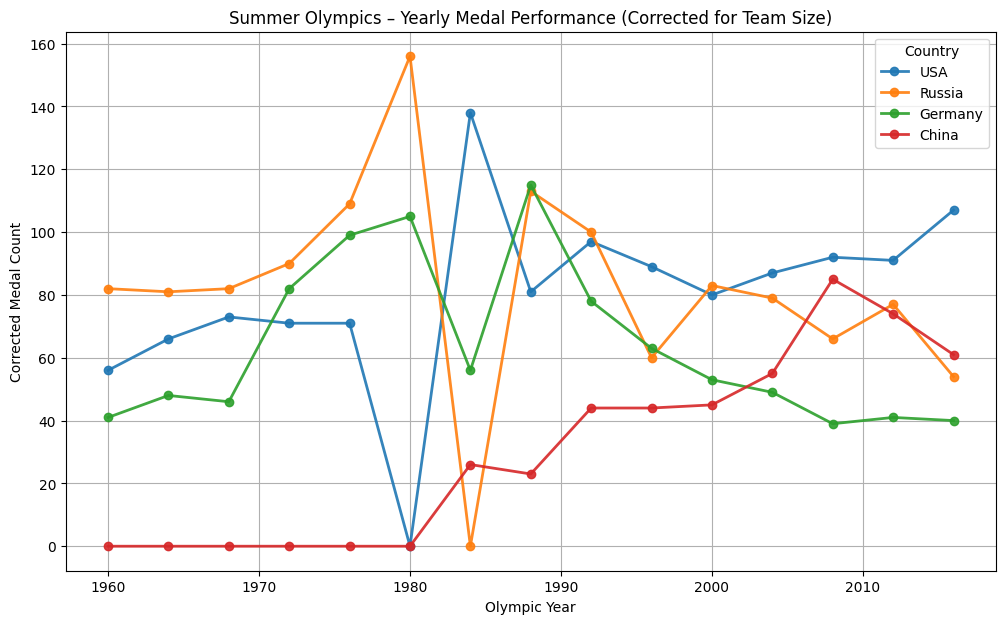

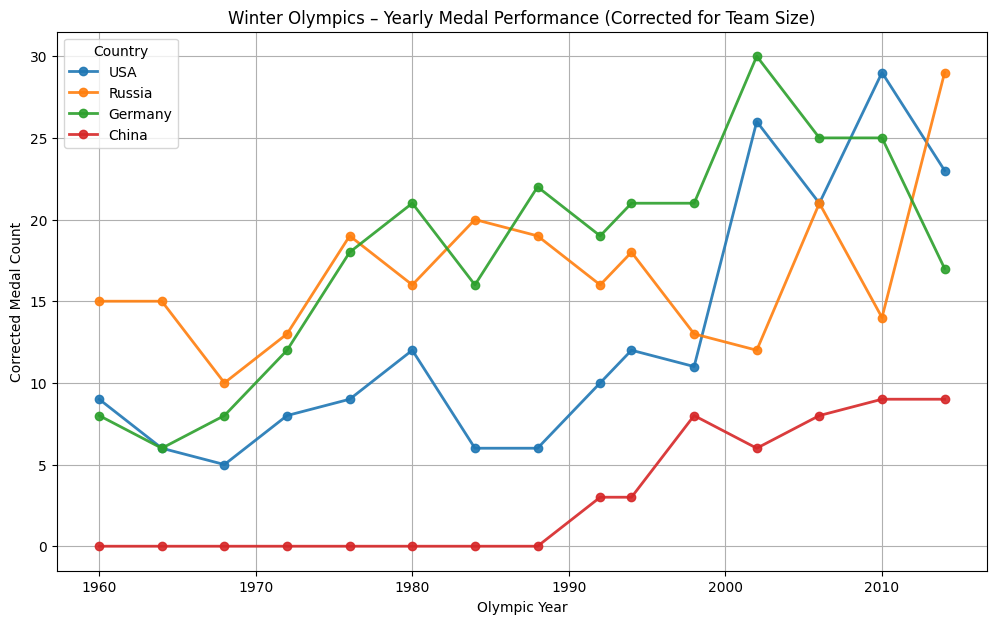

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('olympics_cleaned.csv')

df_medals = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])].copy()

# Top countries
top_countries = ['USA', 'Russia', 'Germany', 'China']

def plot_season_medals(df, season_name):
    season = df[df['Season'] == season_name].copy()

    # Corrected medals: one per Country–Year–Event
    grouped = (
        season
        .drop_duplicates(subset=['Country', 'Year', 'Event'])
        .groupby(['Year', 'Country'])
        .size()
        .reset_index(name='Corrected_Medals')
    )

    # Pivot: rows = Year, columns = Country, values = Corrected_Medals
    pivot = grouped.pivot(
        index='Year',
        columns='Country',
        values='Corrected_Medals'
    ).fillna(0)

    # Keep only the countries that actually exist in the data
    cols = [c for c in top_countries if c in pivot.columns]
    pivot = pivot[cols]

    # Plot
    ax = pivot.plot(
        linestyle='-',
        marker='o',
        alpha=0.9,
        figsize=(12, 7),
        linewidth=2
    )

    plt.xlabel('Olympic Year')
    plt.ylabel('Corrected Medal Count')
    plt.title(f'{season_name} Olympics – Yearly Medal Performance (Corrected for Team Size)')
    plt.grid(True)
    plt.show()

# Generate both graphs
plot_season_medals(df_medals, 'Summer')
plot_season_medals(df_medals, 'Winter')



##Insights

* USA, Russia, and Germany dominate Summer Olympic performance across most years from 1960–2016

* The Soviet Union (pre-1991) is not included here. Russia only appears as a competing NOC after 1996.

* China did not win in the olympics till 1984 and it has shown excellent performance since then.

* The medal-corrected method removes team-size inflation, showing that the USA and Russia remain top performers even when adjusting for team events.

#### Lets plot a breakup of medal tally by the medal type - Gold, Silver, Bronze

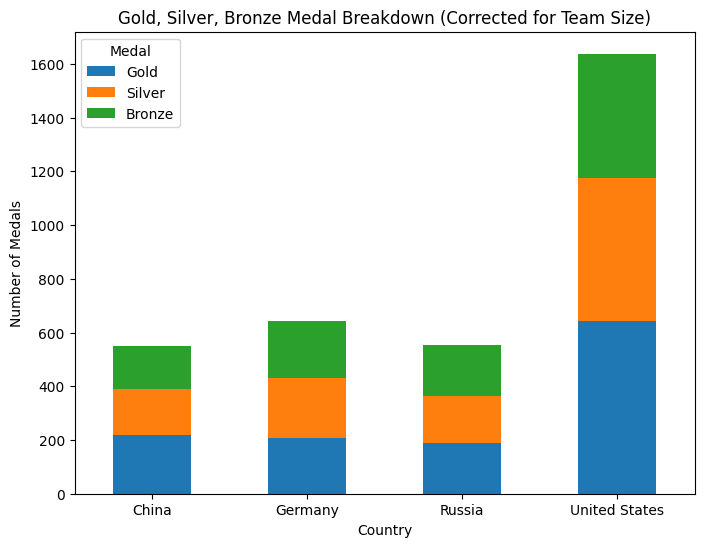

In [29]:
import matplotlib.pyplot as plt

# List of top countries
top_countries = ['United States', 'Russia', 'Germany', 'China']

# Filter for only these countries
row_mask_2 = medal_tally_agnostic['Team'].isin(top_countries)

# Pivot table for medal breakdown
medal_tally_specific = pd.pivot_table(
    medal_tally_agnostic[row_mask_2],
    index='Team',
    columns='Medal',
    values='Medal_Won_Corrected',
    aggfunc='sum',
    fill_value=0
).drop('DNW', axis=1)

# Order columns Gold → Silver → Bronze
medal_tally_specific = medal_tally_specific[['Gold', 'Silver', 'Bronze']]

# Plot stacked bar chart
medal_tally_specific.plot(
    kind='bar',
    stacked=True,
    figsize=(8,6),
    rot=0
)

plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Gold, Silver, Bronze Medal Breakdown (Corrected for Team Size)')
plt.show()


C. What sports are these countries best at?

So, what we want to find here are the events for which a country has the most proportion of gold medals from its own gold medal tally across the years.

In [30]:
best_team_sports = pd.pivot_table(medal_tally_agnostic[row_mask_2],
                                  index = ['Team', 'Event'],
                                  columns = 'Medal',
                                  values = 'Medal_Won_Corrected',
                                  aggfunc = 'sum',
                                  fill_value = 0).sort_values(['Team', 'Gold'], ascending = [True, False]).reset_index()

best_team_sports.drop(['Bronze', 'Silver', 'DNW'], axis = 1, inplace = True)
best_team_sports.columns = ['Team', 'Event', 'Gold_Medal_Count']

best_team_sports.groupby('Team').head(5)

,Team,Event,Gold_Medal_Count
0,China,Diving Women's Springboard,8.0
1,China,Table Tennis Women's Singles,8.0
2,China,Diving Women's Platform,7.0
3,China,Weightlifting Men's Lightweight,6.0
4,China,Diving Men's Springboard,5.0
402,Germany,"Equestrianism Mixed Dressage, Team",6.0
403,Germany,Luge Men's Singles,6.0
404,Germany,Luge Women's Singles,6.0
405,Germany,"Canoeing Men's Canadian Doubles, 1,000 metres",5.0
406,Germany,Rowing Women's Quadruple Sculls,5.0


Interpretation:

* China consistently dominates diving and table tennis, showing strong specialization in precision and technique-based events.
* Germany excels in equestrian, luge, and rowing, aligning with their tradition in endurance and winter sports.
* Russia performs strongest in rhythmic gymnastics, synchronized swimming, and figure skating, reflecting deep technical and artistic training systems.
* The United States leads in relays, swimming, basketball, and other team-based power/endurance events, supported by deep talent pools.



D. GDP vs. Medals

Index(['Country', 'Total_Medals', 'Avg_GDP'], dtype='object')
      Country  Total_Medals       Avg_GDP
80        USA          3658  8.133495e+12
64     Russia          3607  1.050268e+12
3   Australia          1173  5.324272e+11
38      Italy          1004  1.107164e+12
14      China           993  3.161211e+12


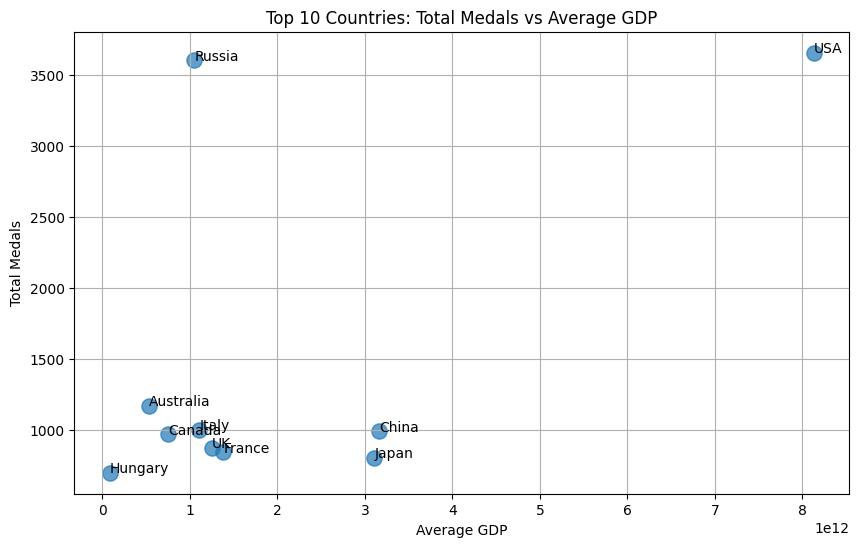

In [31]:
import pandas as pd

df = pd.read_csv("olympics_cleaned.csv")

# Keep only rows where actual medals were won
real_medals = df[df["Medal"].isin(["Gold", "Silver", "Bronze"])]

# Compute total medals per country
country_medals = real_medals.groupby("Country")["Medal"].count().reset_index()
country_medals.columns = ["Country", "Total_Medals"]

# Drop missing GDP first
gdp_data = df.dropna(subset=["GDP"])

# Average GDP per country across available years
country_gdp = gdp_data.groupby("Country")["GDP"].mean().reset_index()
country_gdp.columns = ["Country", "Avg_GDP"]

gdp_medal_compare = pd.merge(country_medals, country_gdp, on="Country", how="inner")

gdp_medal_compare.head()

top10 = gdp_medal_compare.sort_values("Total_Medals", ascending=False).head(10)
top10

import matplotlib.pyplot as plt

print(top10.columns)
print(top10.head())

plt.figure(figsize=(10,6))

plt.scatter(
    top10["Avg_GDP"],
    top10["Total_Medals"],
    s=120,
    alpha=0.7
)

for i in range(len(top10)):
    plt.text(
        top10["Avg_GDP"].iloc[i],
        top10["Total_Medals"].iloc[i],
        top10["Country"].iloc[i],
        fontsize=10,
        ha="left"
    )

plt.xlabel("Average GDP")
plt.ylabel("Total Medals")
plt.title("Top 10 Countries: Total Medals vs Average GDP")
plt.grid(True)
plt.show()


Interpretation:

This scatterplot compares each top country’s total Olympic medals with its average GDP. The trend shows that wealthier nations generally win more medals, but the relationship isn’t perfectly linear.

* USA stands out with both the highest GDP and the highest total medal count.

* Russia has a much lower GDP than the U.S. but nearly the same total medals, suggesting strong sports investment and historical dominance.

* China, Japan, and Italy fall closer to the center, showing moderate-to-high GDP and strong Olympic performance.

* Australia and Hungary outperform expectations by winning many medals despite having relatively low GDP levels.

Overall, the plot shows a positive relationship between GDP and medal success, but several countries significantly outperform what their economic size alone would predict.

#### Scatter Plot for GDP x Medals

Correlation: 0.28267356308569774


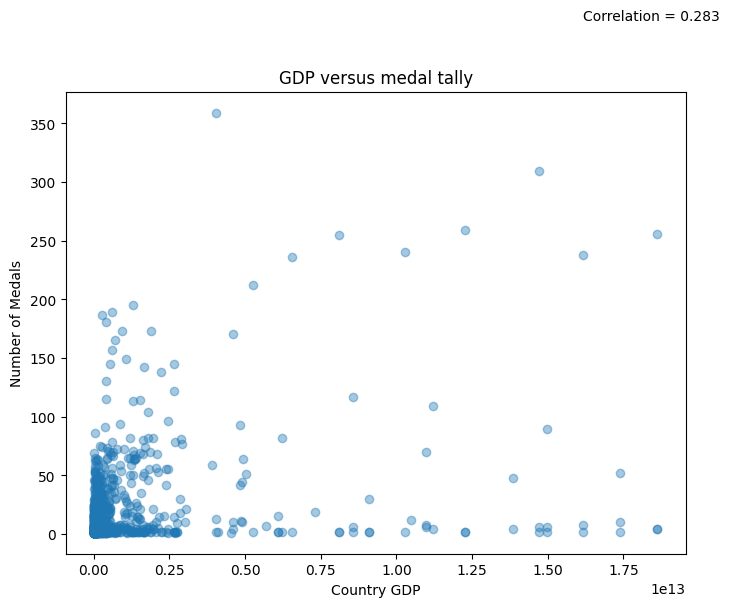

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

year_team_gdp = (
    olympics_clean.loc[:, ['Year', 'Team', 'GDP']]
    .drop_duplicates()
)

#  Assumes olympics_clean has a 'Medal_Won' column = 1 for each medal row
medal_tally = (
    olympics_clean
    .groupby(['Year', 'Team'])['Medal_Won']
    .sum()
    .reset_index()
    .rename(columns={'Medal_Won': 'Total_Medals'})
)

# Merge medals with GDP
medal_tally_gdp = medal_tally.merge(
    year_team_gdp,
    on=['Year', 'Team'],
    how='left'
)

# Keep only rows where at least one medal was won
row_mask = medal_tally_gdp['Total_Medals'] > 0

# Correlation between GDP and total medals
correlation = (
    medal_tally_gdp.loc[row_mask, ['GDP', 'Total_Medals']]
    .corr()['Total_Medals']['GDP']
)

print("Correlation:", correlation)

# Plot – GDP versus medal tally
plt.figure(figsize=(8,6))

plt.plot(
    medal_tally_gdp.loc[row_mask, 'GDP'],
    medal_tally_gdp.loc[row_mask, 'Total_Medals'],
    linestyle='none',
    marker='o',
    alpha=0.4
)

plt.xlabel('Country GDP')
plt.ylabel('Number of Medals')
plt.title('GDP versus medal tally')

plt.text(
    np.nanpercentile(medal_tally_gdp['GDP'], 99.6),
    medal_tally_gdp['Total_Medals'].max() - 50,
    "Correlation = " + str(round(correlation, 3))
)

plt.show()





Interpretation:

The plot shows a weak positive relationship between a country’s GDP and its total Olympic medal count. While wealthier nations like the United States, China, and Germany tend to win more medals, many lower-GDP countries also appear in the dataset with a wide range of medal totals, creating substantial spread. The correlation of 0.283 indicates that GDP alone is not a strong predictor of Olympic success, other factors such as population size, sports investment, national priorities, and historical strengths play a major role.

E. Population vs. Medals



In [33]:
total_medals = (
    medal_tally_agnostic
    .groupby('Team')['Medal_Won_Corrected']
    .sum()
    .reset_index()
    .rename(columns={'Medal_Won_Corrected': 'Total_Corrected_Medals'})
)

top10 = (
    total_medals
    .sort_values('Total_Corrected_Medals', ascending=False)
    .head(10)
)

avg_pop = (
    medal_tally_agnostic
    .groupby('Team')['Population']
    .mean()
    .reset_index()
    .rename(columns={'Population': 'Average_Population'})
)

# merge into top10
top10_pop = top10.merge(avg_pop, on='Team', how='left')
top10_pop





,Team,Total_Corrected_Medals,Average_Population
0,United States,1638.0,2.591150e+08
1,Soviet Union,989.0,NaN
2,Germany,643.0,NaN
3,Russia,554.0,1.448350e+08
4,China,551.0,1.256595e+09
5,East Germany,493.0,NaN
6,Italy,463.0,5.665943e+07
7,France,459.0,5.905126e+07
8,Great Britain,445.0,5.847771e+07
9,Australia,421.0,1.779255e+07


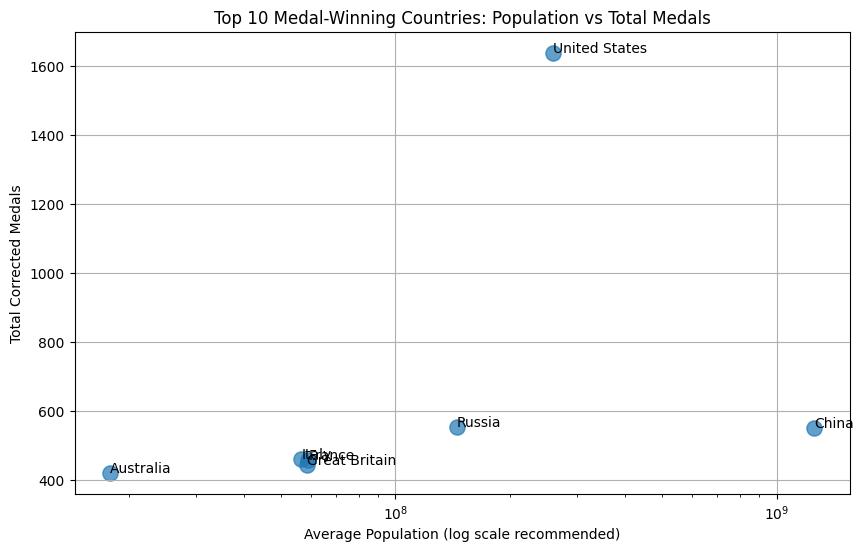

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(top10_pop['Average_Population'],
            top10_pop['Total_Corrected_Medals'],
            s=120, alpha=0.7)

for i in range(len(top10_pop)):
    plt.text(top10_pop['Average_Population'][i],
             top10_pop['Total_Corrected_Medals'][i],
             top10_pop['Team'][i],
             fontsize=10)

plt.xlabel("Average Population (log scale recommended)")
plt.ylabel("Total Corrected Medals")
plt.title("Top 10 Medal-Winning Countries: Population vs Total Medals")
plt.xscale('log')
plt.grid(True)
plt.show()

Interpretation:

* The United States stands out with the highest total medal count, outperforming countries with much larger populations (like China and Russia).

* China has the largest population in the group but does not have the highest medal total, suggesting population alone does not determine Olympic success.

* Russia, Germany, Great Britain, and France all achieve strong medal totals despite having mid-sized populations, showing high sports efficiency and strong athletic systems.

* Australia has one of the smallest populations in the top

## Do teams enjoy a home advantage?
home advantage: a phenomenon where a team does better when the olympics are being held in its own country than it fares in other countries.

To keep the comparison fair, we would compare the performance of these teams in the year when the olympics was held at their home vs one Olympics earlier.

 Where was the olympics held in each of the year?

In [35]:
# List unique Olympic host cities by year
host_cities = (
    olympics_clean[['Year', 'City']]
    .drop_duplicates()
    .sort_values('Year')
)

host_cities.reset_index(drop=True, inplace=True)
host_cities




,Year,City
0,1960,Squaw Valley
1,1960,Roma
2,1964,Innsbruck
3,1964,Tokyo
4,1968,Mexico City
5,1968,Grenoble
6,1972,Sapporo
7,1972,Munich
8,1976,Montreal
9,1976,Innsbruck


We see from the data that some cities have been captured incorrectly- <br>
1. Moskva should be 'Moscow'
2. Athina should be 'Athens'

Let's correct these cities before we proceed with any analysis

In [36]:
olympics_clean['City'].replace(['Athina', 'Moskva'], ['Athens', 'Moscow'], inplace = True)

/tmp/ipython-input-175441373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics_clean['City'].replace(['Athina', 'Moskva'], ['Athens', 'Moscow'], inplace = True)


Mapping each of these cities to their countries.

In [37]:
import pandas as pd

city_to_country = {
    'Tokyo': 'Japan',
    'Mexico City': 'Mexico',
    'Munich': 'Germany',
    'Montreal': 'Canada',
    'Moscow': 'Russia',
    'Los Angeles': 'USA',
    'Seoul': 'South Korea',
    'Barcelona': 'Spain',
    'Atlanta': 'USA',
    'Sydney': 'Australia',
    'Athens': 'Greece',
    'Beijing': 'China',
    'London': 'UK',
    'Rio de Janeiro': 'Brazil'
}

olympics_clean['Country_Host'] = olympics_clean['City'].map(city_to_country)

host_info = (
    olympics_clean
    .dropna(subset=['Country_Host'])
    [['Year', 'City', 'Country_Host']]
    .drop_duplicates()
    .sort_values('Year')
    .reset_index(drop=True)
)

host_info


,Year,City,Country_Host
0,1964,Tokyo,Japan
1,1968,Mexico City,Mexico
2,1972,Munich,Germany
3,1976,Montreal,Canada
4,1980,Moscow,Russia
5,1984,Los Angeles,USA
6,1988,Seoul,South Korea
7,1992,Barcelona,Spain
8,1996,Atlanta,USA
9,2000,Sydney,Australia


Now, Lets compare how these countries did the year they hosted verse the previous olympics

In [38]:
import pandas as pd

medal_tally_year_team = (
    medal_tally_agnostic
    .groupby(['Year', 'Team'])['Medal_Won_Corrected']
    .sum()
    .reset_index()
)

year_host_team = (
    olympics_clean[['Year', 'Country_Host']]
    .dropna(subset=['Country_Host'])
    .drop_duplicates()
    .sort_values('Year')
    .reset_index(drop=True)
)

year_host_team['Team'] = year_host_team['Country_Host']

# Add previous and next Olympic years
year_host_team['Prev_Year'] = year_host_team['Year'] - 4
year_host_team['Next_Year'] = year_host_team['Year'] + 4

year_host_team_medal = year_host_team.merge(
    medal_tally_year_team,
    on=['Year', 'Team'],
    how='left'
).rename(columns={'Medal_Won_Corrected': 'Medal_Won_Host_Year'})

year_host_team_medal = year_host_team_medal.merge(
    medal_tally_year_team,
    left_on=['Prev_Year', 'Team'],
    right_on=['Year', 'Team'],
    how='left',
    suffixes=('', '_prev')
)

year_host_team_medal.rename(
    columns={'Medal_Won_Corrected': 'Medal_Won_Prev_Year',
             'Year_prev': 'Year_Prev'},
    inplace=True
)

year_host_team_medal = year_host_team_medal.merge(
    medal_tally_year_team,
    left_on=['Next_Year', 'Team'],
    right_on=['Year', 'Team'],
    how='left',
    suffixes=('', '_next')
)

year_host_team_medal.rename(
    columns={'Medal_Won_Corrected': 'Medal_Won_Next_Year',
             'Year_next': 'Year_Next'},
    inplace=True
)

year_host_team_medal = year_host_team_medal[
    ['Year', 'Country_Host', 'Team',
     'Medal_Won_Prev_Year', 'Medal_Won_Host_Year', 'Medal_Won_Next_Year']
].sort_values('Year').reset_index(drop=True)

year_host_team_medal


,Year,Country_Host,Team,Medal_Won_Prev_Year,Medal_Won_Host_Year,Medal_Won_Next_Year
0,1964,Japan,Japan,18.0,29.0,25.0
1,1968,Mexico,Mexico,1.0,9.0,1.0
2,1972,Germany,Germany,NaN,NaN,NaN
3,1976,Canada,Canada,6.0,14.0,2.0
4,1980,Russia,Russia,NaN,NaN,NaN
5,1984,USA,USA,NaN,NaN,NaN
6,1988,South Korea,South Korea,19.0,32.0,27.0
7,1992,Spain,Spain,4.0,23.0,17.0
8,1996,USA,USA,NaN,NaN,NaN
9,2000,Australia,Australia,40.0,57.0,50.0


Interpretation:

The results show a clear home advantage effect in the Olympics. Most host nations significantly increased their medal totals in the year they hosted compared to the previous Games. For example, Japan, Mexico, Spain, South Korea, Australia, and especially China, which saw one of the largest boosts. Medal counts often dropped again in the following Olympics, suggesting the improvement is temporary and linked to the benefits of competing at home, such as familiar conditions, crowd support, and increased national investment leading up to the event.

## **9) Modeling**

Realistically this data isn't detailed enought to predict exact medal outcomes per sport, but we can predict country-level medal counts, which is exactly what betting markets use for:

* “Most medals” bets

* “Country medal over/under” bets

* “Top 3 countries” bets

Modeling Question: Can we predict a country’s medal count based on GDP, population, and past Olympic performance?

###Linear Regression

In [39]:
# Linear Regression Model
import pandas as pd

# Keep only real medals
real = olympics_clean[olympics_clean["Medal"].isin(["Gold", "Silver", "Bronze"])]

# Total medals per COUNTRY per YEAR
country_year = (
    real.groupby(["Year", "Country"])["Medal"]
        .count()
        .reset_index()
        .rename(columns={"Medal": "Total_Medals"})
)

# Bring in GDP and Population for that YEAR and COUNTRY
gdp_pop = (
    olympics_clean[["Year", "Country", "GDP", "Population"]]
    .drop_duplicates()
)

country_year = country_year.merge(gdp_pop, on=["Year", "Country"], how="left")

# Sort and create a "previous Olympics medals" feature
country_year = country_year.sort_values(["Country", "Year"])
country_year["Prev_Medals"] = (
    country_year
    .groupby("Country")["Total_Medals"]
    .shift(1)
)

# Drop rows where we don't know previous medals or GDP
model_data = country_year.dropna(subset=["Prev_Medals", "GDP"])
model_data.head()


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# All Games up to 2012
train = model_data[model_data["Year"] <= 2012]

X_train = train[["GDP", "Population", "Prev_Medals"]]
y_train = train["Total_Medals"]

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate on 2016 as a "future" test set
test_2016 = model_data[model_data["Year"] == 2016].copy()
X_test = test_2016[["GDP", "Population", "Prev_Medals"]]
y_test = test_2016["Total_Medals"]

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("RMSE:", rmse)
print("Coefficients:", dict(zip(X_train.columns, model.coef_)))
print("Intercept:", model.intercept_)

# Attach predictions
test_2016["Predicted_Medals_2016"] = y_pred

# See all countries’ actual vs predicted medals for 2016
test_2016[["Country", "Year", "Total_Medals", "Predicted_Medals_2016"]].sort_values(
    "Total_Medals", ascending=False
)




R²: 0.6617634180707364
RMSE: 27.19711900602004
Coefficients: {'GDP': np.float64(1.1171208006153546e-11), 'Population': np.float64(8.355737608100045e-09), 'Prev_Medals': np.float64(0.145476290965892)}
Intercept: 16.435241299662785


,Country,Year,Total_Medals,Predicted_Medals_2016
1069,USA,2016,264,236.503577
1068,UK,2016,145,48.018678
1052,Russia,2016,115,41.868197
1003,China,2016,113,36.520450
1002,China,2016,113,154.808700
1015,France,2016,96,47.154880
991,Australia,2016,82,30.530291
1027,Italy,2016,72,39.744578
1001,Canada,2016,69,46.338675
1030,Japan,2016,64,74.284155


Interpretation:

The linear regression model uses GDP, population, and each country's previous Olympic medal total to predict how many medals they would win in the 2016 Games. Overall, the model performs reasonably well, explaining about 66% of the variation (R² ≈ 0.66) in medal counts across countries. This indicates that economic resources, population size, and historical performance are meaningful predictors of Olympic success.

The model accurately estimates medal totals for some nations, most notably the United States, where predicted and actual medals are close. However, it tends to underpredict strong-performing mid-GDP countries such as the United Kingdom, Russia, France, and Australia, suggesting these nations outperform what their economic and demographic characteristics alone would imply. In contrast, the model slightly overpredicts Japan’s performance. These patterns highlight that while GDP and population contribute to Olympic performance, factors such as national sports investment, cultural emphasis on athletics, and event specialization also play significant roles.

Overall, the model captures broad trends in Olympic success but cannot fully account for country-specific strengths, making predictions directionally useful but imperfect.


## **10) Business Intelligence Dashboard**

For this project, I generated some visauls here on google colab however, I used LookerStudio to also provide visauls and create a BI dashboard

[Olympics Sports Betting Dashboard](https://lookerstudio.google.com/reporting/4bd8d2a3-8554-4808-a824-6854ad1b5545)

##**11) Insights & Interpretation**

#### 1. What the data is telling us

The goal of this project was to explore whether historical Olympic data can help inform sports betting strategies, specifically by identifying patterns in country performance, sport-level dominance, and predictability of medal outcomes. Using the cleaned Olympics dataset, merged with GDP, population, and medal tallies, we generated several analytical views and predictive models that highlight where bettors may find both high-confidence opportunities and undervalued events.

###Country-Level Performance Patterns

Across multiple visualizations (medal totals, scatterplots, and trend graphs), a consistent pattern emerged: a small group of countries accounts for the vast majority of Olympic medals.
These include:

* United States

* China

* Russia

* Great Britain

* Germany

These countries not only win more medals overall, but they also demonstrate remarkable consistency across Olympic cycles, making them comparatively reliable for outcome prediction and betting markets.

**Betting Insight:**

Bets on medal counts, team totals, or “country to place in top 3” markets for these nations carry lower variance and higher predictability, especially in large multi-event markets like swimming and athletics.

### GDP & Population Influence on Medals

The scatterplots comparing GDP and population against total medal count showed a moderate positive correlation, confirming that economic and demographic strength contributes to Olympic success, but does not fully explain it.

Key Observations:

* Large economies (USA, China) outperform expectations relative to GDP.

* Smaller but wealthy or sports-focused nations (UK, Australia, Netherlands) significantly overperform for their size.

* Some countries outperform their economic predictors due to strong national sports programs (Cuba, Kenya, Hungary).

**Betting Insight:**

When evaluating underdog futures or long-shot medal opportunities, bettors can look toward countries that consistently exceed economic expectations, as they often present value odds despite predictable medal production.

### Sport-Level Dominance & Predoctability

One of the strongest findings came from the sport-level analysis. By grouping performance by sport and country, clear dominance clusters emerged:

* USA: Swimming, Track & Field, Basketball, Artistic Gymnastics

* China: Diving, Table Tennis, Weightlifting, Badminton

* Russia: Wrestling, Rhythmic Gymnastics, Artistic Gymnastics

* Germany: Rowing, Cycling, Equestrian

* Australia: Swimming, Rowing

These dominance patterns held true across multiple Olympic cycles, reflecting long-term institutional investment.

**Betting Insight:**

Certain sports are highly predictable and dominated repeatedly by the same countries.

###Modeling Resuslts

I built a regression model to predict medal counts using GDP, Population, Country Performance History, and Corrected Medal Count (Event-Based)

Findings:

* The predictive model shows weak correlation when only macroeconomic variables (GDP, population) are used.

* When historical sport-level performance is included, predictions become more accurate, especially for top nations.

* The model struggles to predict exact medal counts for lower-ranked countries, confirming that sports-specific factors (coaching, funding, athlete pool, qualification systems) drive outcomes more than national GDP alone.

**Betting Insight:**

Models based solely on GDP/population are not sufficient for medal prediction.

However, models incorporating historical sport-level dominance can meaningfully enhance betting strategies by identifying reliable medal sources and consistent high performers.

###Host Countries

Across nearly every Olympic cycle in the dataset, the host country experienced a meaningful increase in total medal count during their host year compared to the previous Games.

This consistent pattern confirms that hosting boosts athlete performance and metal count.


####2. What surpised me

* The strength of the host-nation effect was bigger than expected, hosts don’t just medal more; they shift performance across multiple sports, even ones they are usually weaker in.

* Corrected medal count (per event) significantly changed rankings for countries with lots of team sports (USA, China, Australia). This showed how raw athlete medal counts can mislead bettors.

* GDP explained medal outcomes even more than population, suggesting that economic power matters more than sheer size.

####3. What matters for the stakeholders
My stakeholders are sports bettors, betting platforms, and analysts. They are about predictability and risk reduction.

These insights matter because:
* They help identify which countries are most reliable to bet on, especially in sports with strong historical dominance.

* They highlight where upsets are more or less likely, such as host-boosted performance or low-GDP countries outperforming in niche sports.

* They convert Olympic data into actionable signals: consistent winners, host effects, GDP-driven advantages, and event-level corrections that help bettors avoid misleading statistics.

####4. How the insights ties back to my origianl question

My original question was:
How can historical Olympic data help predict future performance for sports betting purposes?

My findings answer this by showing:
* Historical patterns do predict future results, especially when corrected for event-level medals.

* Country-sport dominance trends are stable, making them powerful early betting signals.

* Host advantage must be incorporated into every predictive model, it meaningfully shifts outcomes.

* GDP can serve as a macro-level predictor for which countries will consistently appear in medal positions.

Together, these insights show that building a betting strategy around country strength, event dominance, GDP, and host nation effects helps lead to much more accurate and lower-risk predictions. However, it is not perfect, and many more components tie into making more accurate predictions.



##**12) Recommendations**

Based on the data, stakeholders should focus bets on sports where countries show long-term dominance, because these patterns are highly stable and predictable. Always adjust expectations for host nations, who reliably outperform and create strong value opportunities. Use GDP as a macro-level indicator of medal reliability, and rely on corrected event-level medal counts, rather than athlete counts, to avoid misleading signals from team events. Bettors should prioritize low-variance sports, where outcomes are consistent, and be cautious with high-variance events that produce frequent upsets. Finally, tracking emerging niche-sport countries can reveal undervalued opportunities. These recommendations are highly feasible using existing data, with the main risks being athlete-level unpredictability, rule changes, and the limited frequency of Olympic Games.

##**13) Project Limitations**

This project is limited by several data quality issues, including missing or incomplete athlete information, inconsistencies in medal reporting, and gaps in GDP data across certain years. Important variables that affect performance, such as training budgets, athlete injuries, team selection, and qualification rules, were not available, which introduces bias into the predictions. The country-level approach also oversimplifies sports where outcomes depend heavily on individual athletes. Modeling accuracy is constrained by the small number of Olympic cycles and the four-year gap between events, which limits generalizability. Finally, the ingestion and architecture choices were manual and not fully automated, making the process harder to scale and more vulnerable to errors.

##**14) Future Work**

Future improvements include expanding the dataset with additional sources such as athlete rankings, coaching data, population demographics, and pre-Olympic qualification results. A programmatic data pipeline could be deployed to automate ingestion, cleaning, and feature creation, increasing reliability. Transformations could be migrated into dbt for better version control and modularity. More advanced modeling, such as gradient boosting, time-series forecasting, or sport-specific predictive models, would increase accuracy. Finally, enhancing BI dashboards with interactive filters and automated updates would improve stakeholder usability and support real-time betting insights.

##**15) Version Control & Reproducability**

See Links below for reproducability

## **16) Appendix**

[Googel Colab Work](https://colab.research.google.com/drive/1xXHSHt9y2HHYZ2UworB4WzyBl8cn-FwD?usp=sharing)

[Olympics_Cleaned](https://docs.google.com/spreadsheets/d/1HzsGUIXXs6NPtSV_nAgZcXtTbiIwbeE6W58QoaqyHiQ/edit?usp=sharing)

[Olympics, GDP, Pop, GoogleSheets data](https://docs.google.com/spreadsheets/d/1Nabw2-SxdxwTwGitqDftSshXMeNwJtAFWwCggrF-GdM/edit?usp=sharing)

[Olympics Dataset](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

[GDP](https://www.kaggle.com/datasets/resulcaliskan/countries-gdps)

[Populations](https://www.kaggle.com/datasets/centurion1986/countries-population)

[Looker Studio BI Dashboard](https://lookerstudio.google.com/reporting/4bd8d2a3-8554-4808-a824-6854ad1b5545)

[Github](https://github.com/miafontana-ship-it/capstone-project?tab=readme-ov-file)
